##### in this notebook, you will be able to have a first look at the code I have written for my application to the MarcArthur Lab as an Associate Computational Biologist, you can have a further look in the python file. this code was done as a draft in the course of a week end. it should be fairly flexible in its use but don't try to push it too much  ;)
Best

# Loading everyhting 

In [4]:
%load_ext autoreload
%autoreload 2
import population

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pop = population.Population()

In [90]:
len(pop)

0

# Let's download the dataset

In [91]:
pop.load_dataset()

file is already there
file is already there


# filter the variant

We can now use `filter_variants` to bypass the clumsy command lines and have it filtered for us, we can select a file ourselves, the output and much more (things are computed __in parallel__ for greater efficiency

In [6]:
pop.filter_variants(name="data/data_miniproj.vcf.bgz", out="highfilt", minmissing=30000, maxr2=0.25, callrate=0.8, maxallelefreq=0.01)

assuming you have mawk, vcftools, cat, cut installed
applying first filter
applying second filter
finding if too much missing individuals and recoding the file
removing garbage..
dividing the input file..
running the ld prunning in parallel (might still take time (avg is 60mn)
it took 5500.31930304 seconds
concatenating every file
now prunning...


## we can load the label file 

you can select a file if you want, it is supposed to receive __labels__ and __ids__

In [7]:
pop.extract_unlabeled()

# let's load the vcf in memory

we use this function (there is a non parallel one) to load a vcf file in memmory and do computation on it

In [8]:
pop.par_load_from_vcf(filename='data/highfilt.recode.vcf', printinfo=True)

dividing the input file..
having 84 chromosomes
OrderedDict([('fileformat', 'VCFv4.2'), ('hailversion', ['devel-76c42fe'])])
3101804739
done 0 of chrom 2
done 0 of chrom 1
done 0 of chrom 3
done 0 of chrom 4
done 0 of chrom 5
done 0 of chrom 6
done 0 of chrom 7
done 0 of chrom 8
done 500 of chrom 1
done 500 of chrom 3
done 500 of chrom 8
done 500 of chrom 7
done 500 of chrom 5
done 500 of chrom 6
done 500 of chrom 2
done 500 of chrom 4
done 1000 of chrom 8
done 1000 of chrom 6
done 1000 of chrom 7
done 1000 of chrom 1
done 1000 of chrom 4
done 1000 of chrom 2
done 1000 of chrom 3
done 1000 of chrom 5
finished chrom 8
done 1500 of chrom 7
done 1500 of chrom 6
done 1500 of chrom 1
done 1500 of chrom 2
done 0 of chrom 9
done 1500 of chrom 4
done 1500 of chrom 3
done 1500 of chrom 5
finished chrom 4
finished chrom 5
finished chrom 7
finished chrom 6
done 0 of chrom 10
finished chrom 3
done 500 of chrom 9
done 2000 of chrom 2
done 2000 of chrom 1
done 0 of chrom 11
finished chrom 2
done 500

In [ ]:
pop.train_gt.shape

# Do PCA

actually you can choose many version of the PCA algorithm (see more in the second notebook) and select your `nb_components` yourself.

In [96]:
pop.reduce_features(n_components=400,reducer='kpca',val='pha')

In [82]:
pop.pred_red

array([], shape=(0, 400), dtype=float64)

# Train classifier

you van now train many classifiers of your choosing 

In [73]:
pop.train_classifier(classifier='knn', test='CV', scoring='accuracy')

cv scores : [0.83990719 0.89953271 0.86885246]
the total score is of 0.8694307872907244


0.8694307872907244

In [74]:
pop.train_classifier(classifier='gaussian', test='CV', scoring='accuracy')

cv scores : [0.17633411 0.17757009 0.17798595]
the total score is of 0.1772967162214113


0.1772967162214113

In [97]:
pop.train_classifier(classifier='svm', test='CV', scoring='accuracy')

cv scores : [0.87238979 0.90654206 0.92505855]
the total score is of 0.9013301317558096


0.9013301317558096

# you can now have a prediction

As always you can predict you own data if you want, the prediction are available directly in the object as `pop` acts similarly to __dictionnary__

In [98]:
pred = pop.predict_labels()

In [99]:
pred

array(['nfe', 'nfe', 'eas', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'amr', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'nfe', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'amr', 'nfe', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'sas', 'amr', 'nfe', 'nfe', 'amr', 'afr', 'nfe', 'amr',
       'nfe', 'amr',

# other trials 

these are functions you can use also to try to infer more from the dataset.

In [102]:
pop.compute_features_nb(classifier='svm', vmin=50, vmax=1000, step=50)

AttributeError: 'Population' object has no attribute 'reducedim'

In [103]:
pop.par_load_from_vcf(filename='data/filtered2.recode.vcf', printinfo=True)

dividing the input file..
having 84 chromosomes
OrderedDict([('fileformat', 'VCFv4.2'), ('hailversion', ['devel-76c42fe'])])
3101804739
done 0 of chrom 2
done 0 of chrom 1
done 0 of chrom 4
done 0 of chrom 5
done 0 of chrom 3
done 0 of chrom 7
done 0 of chrom 6
done 0 of chrom 8
done 500 of chrom 6
done 500 of chrom 7
done 500 of chrom 1
done 500 of chrom 4
done 500 of chrom 2
done 500 of chrom 5
done 500 of chrom 8
done 500 of chrom 3
done 1000 of chrom 7
done 1000 of chrom 8
done 1000 of chrom 6
done 1000 of chrom 4
done 1000 of chrom 1
done 1000 of chrom 5
done 1000 of chrom 2
done 1000 of chrom 3
done 1500 of chrom 7
done 1500 of chrom 8
done 1500 of chrom 6
done 1500 of chrom 4
done 1500 of chrom 2
done 1500 of chrom 1
done 1500 of chrom 5
done 1500 of chrom 3
done 2000 of chrom 7
done 2000 of chrom 8
done 2000 of chrom 6
done 2000 of chrom 4
done 2000 of chrom 2
done 2000 of chrom 1
done 2000 of chrom 5
done 2000 of chrom 3
done 2500 of chrom 7
done 2500 of chrom 8
done 2500 of c

In [56]:
pop.reduce_features(n_components=100,val='pha',reducer='lda')

In [57]:
pop.train_classifier(classifier='svm', test='CV', scoring='accuracy')

cv scores : [0.88399072 0.9182243  0.92974239]
the total score is of 0.9106524690272478


0.9106524690272478

cv scores : [0.9837587  0.98831776 0.96955504]
the total score is of 0.9805438309447357
cv scores : [0.96983759 0.98364486 0.96487119]
the total score is of 0.9727845470664785
cv scores : [0.97447796 0.98831776 0.91569087]
the total score is of 0.9594955272521811
cv scores : [0.98839907 0.99065421 0.91334895]
the total score is of 0.964134074556354
cv scores : [0.98839907 0.99065421 0.87119438]
the total score is of 0.9500825523081105
cv scores : [0.96983759 0.98364486 0.7587822 ]
the total score is of 0.9040882160750656
cv scores : [0.95359629 0.97663551 0.71662763]
the total score is of 0.8822864787940431
cv scores : [0.94199536 0.94859813 0.69555035]
the total score is of 0.8620479472526493


(array([0.86204795, 0.88228648, 0.90408822, 0.95008255, 0.95949553,
        0.96413407, 0.97278455, 0.98054383]), [19, 17, 15, 13, 9, 11, 7, 5])

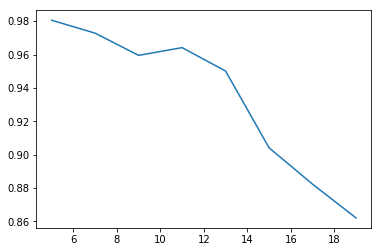

In [11]:
pop.compute_features_nb(classifier='gaussian',reducer='lda',vmax=20,vmin=5,step=2)

## PCvalues are ploted and colors means labels 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1286 samples in 0.002s...
[t-SNE] Computed neighbors for 1286 samples in 0.148s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1286
[t-SNE] Computed conditional probabilities for sample 1286 / 1286
[t-SNE] Mean sigma: 1.894455
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.154911
[t-SNE] Error after 1000 iterations: 0.866266


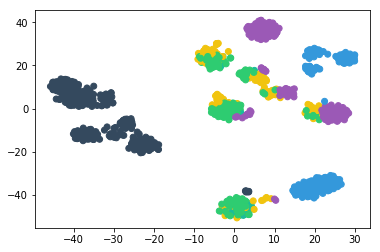

In [16]:
pop.plotPC(foundplot=False)

In [58]:
pop.predict_labels()

not checking that you are using svm
----------------------
MacArthurLab_1has:
0.00402936044127417% chance to be non finish european
0.053777786930865996% chance to be south asian
0.0008905532573511874% chance to be east asian
0.20061478344666647% chance to be mixed american
0.7167523854687259% chance to be finish
0.023935130455115954% chance to be african
----------------------
MacArthurLab_2has:
0.007005786011440159% chance to be non finish european
0.12154874702558037% chance to be south asian
0.005503629279681703% chance to be east asian
0.17189307829297704% chance to be mixed american
0.5667069283907811% chance to be finish
0.1273418309995394% chance to be african
----------------------
MacArthurLab_4has:
0.001437951864283039% chance to be non finish european
0.0021444650423632556% chance to be south asian
#### 0.9593768634623142% chance to be east asian
0.001179913695965631% chance to be mixed american
0.0013461248292391931% chance to be finish
0.034514681105834506% chance to be a

----------------------
MacArthurLab_614has:
0.0002513871455624967% chance to be non finish european
#### 0.9947119136181476% chance to be south asian
0.0010672282164448435% chance to be east asian
0.0023679247344309856% chance to be mixed american
0.0012619588857992461% chance to be finish
0.0003395873996143111% chance to be african
----------------------
MacArthurLab_618has:
0.0004401546947251994% chance to be non finish european
#### 0.9928248747143952% chance to be south asian
0.003341294992808639% chance to be east asian
0.0017694551699461636% chance to be mixed american
0.0007413614854672641% chance to be finish
0.0008828589426573864% chance to be african
----------------------
MacArthurLab_621has:
#### 0.9965160711978956% chance to be non finish european
0.0008962441301596172% chance to be south asian
0.00037440771544196305% chance to be east asian
0.0003932564170415383% chance to be mixed american
0.0005495943716700479% chance to be finish
0.0012704261677911961% chance to be afr

0.004262445350502995% chance to be african
----------------------
MacArthurLab_694has:
#### 0.9763487579948147% chance to be non finish european
0.00460276857675076% chance to be south asian
0.004097672539740376% chance to be east asian
0.0013604144604920903% chance to be mixed american
0.001577569693809728% chance to be finish
0.012012816734392846% chance to be african
----------------------
MacArthurLab_696has:
#### 0.9987848429490191% chance to be non finish european
0.00023273813597163553% chance to be south asian
0.0001731534482856616% chance to be east asian
0.0002141844048368702% chance to be mixed american
0.00012323680825289396% chance to be finish
0.0004718442536337515% chance to be african
----------------------
MacArthurLab_702has:
#### 0.9946102309267132% chance to be non finish european
0.0012825034098702824% chance to be south asian
0.0002533988074351513% chance to be east asian
0.0003687532902419452% chance to be mixed american
0.0008204934984050106% chance to be finish

0.0003788065142106199% chance to be finish
0.0002968508412183737% chance to be african
----------------------
MacArthurLab_1825has:
#### 0.9967825882561694% chance to be non finish european
0.0012903143942322114% chance to be south asian
0.0003406304239861477% chance to be east asian
0.0005775469503314883% chance to be mixed american
0.0004910639750497802% chance to be finish
0.0005178560002307843% chance to be african
----------------------
MacArthurLab_1836has:
0.0018915444200824515% chance to be non finish european
0.14655983886636598% chance to be south asian
0.001619552695727115% chance to be east asian
0.07233211743165371% chance to be mixed american
#### 0.7702709429504857% chance to be finish
0.007326003635685024% chance to be african
----------------------
MacArthurLab_1840has:
0.004989429779198101% chance to be non finish european
0.03970943584297275% chance to be south asian
0.0033102928379152687% chance to be east asian
0.0983298542784363% chance to be mixed american
#### 0

[['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.9593768634623142],
 ['afr', 0.8893845131005604],
 ['afr', 0.8499184580276334],
 ['afr', 0.7515112582116887],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.8073423050219813],
 ['afr', 0.8528472747215143],
 ['afr', 0.9070104313517514],
 ['afr', 0.8767542667988115],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.9637363447138232],
 ['afr', 0.8625006576142298],
 ['afr', 0.9254481931639801],
 ['afr', 0.8351771420106096],
 ['afr', 0.7587778850811178],
 ['afr', 'U'],
 ['afr', 0.8505690672889311],
 ['afr', 0.8795171913097872],
 ['afr', 0.8018129676161084],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.9210389609933023],
 ['afr', 0.8824042966761476],
 ['afr', 0.9140527722499665],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.8052279586152126],
 ['afr', 'U'],
 ['afr', 0.8553771886897851],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', '

In [59]:
pop.plotPC(interactive = True)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1966 samples in 0.004s...
[t-SNE] Computed neighbors for 1966 samples in 0.779s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1966
[t-SNE] Computed conditional probabilities for sample 1966 / 1966
[t-SNE] Mean sigma: 2.045453
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.642860
[t-SNE] Error after 1000 iterations: 1.286501
 if you are on a notebook you should write 'from bokeh.io import output_notebook'


Loading BokehJS ...

Figure(id='fe84bbdf-a09c-4288-baee-54b3b55e55c0', ...)

In [60]:
pop.reduce_features(n_components=10,val='pha',reducer='lda')

In [61]:
pop.train_classifier(classifier='gaussian', test='CV', scoring='accuracy')

cv scores : [0.87238979 0.92757009 0.89227166]
the total score is of 0.8974105158015683


0.8974105158015683

In [62]:
pop.predict_labels()

array(['nfe', 'sas', 'eas', 'nfe', 'nfe', 'nfe', 'nfe', 'fin', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'fin', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'fin', 'nfe', 'fin', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'fin', 'amr', 'fin', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'fin', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'amr', 'fin', 'nfe', 'fin', 'fin', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'amr', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'amr', 'amr', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'sas', 'amr', 'nfe', 'nfe', 'nfe', 'afr', 'nfe', 'amr',
       'nfe', 'amr',

In [64]:
pop.plotPC(interactive = True)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1966 samples in 0.001s...
[t-SNE] Computed neighbors for 1966 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1966
[t-SNE] Computed conditional probabilities for sample 1966 / 1966
[t-SNE] Mean sigma: 0.804132
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.365391
[t-SNE] Error after 1000 iterations: 0.655073
 if you are on a notebook you should write 'from bokeh.io import output_notebook'


Loading BokehJS ...

Figure(id='c43d0122-b397-4dcf-bfcc-6d27de087183', ...)

In [69]:
pop.savedata('highprun_gaussian')

writing in highprun_gaussian
it worked !


In [71]:
pop.par_load_from_vcf(filename="data/out.recode.vcf")

dividing the input file..
having 84 chromosomes
OrderedDict([('fileformat', 'VCFv4.2'), ('hailversion', ['devel-76c42fe'])])
3101804739
done 0 of chrom 1
done 0 of chrom 2
done 0 of chrom 4
done 0 of chrom 3
done 0 of chrom 5
done 0 of chrom 6
done 0 of chrom 8
done 0 of chrom 7
done 500 of chrom 6
done 500 of chrom 5
done 500 of chrom 2
done 500 of chrom 8
done 500 of chrom 3
done 500 of chrom 7
done 500 of chrom 4
done 500 of chrom 1
done 1000 of chrom 8
done 1000 of chrom 5
done 1000 of chrom 2
done 1000 of chrom 7
done 1000 of chrom 3
done 1000 of chrom 6
done 1000 of chrom 1
done 1000 of chrom 4
finished chrom 8
done 1500 of chrom 5
done 0 of chrom 9
done 1500 of chrom 7
done 1500 of chrom 2
done 1500 of chrom 1
done 1500 of chrom 3
done 1500 of chrom 6
done 1500 of chrom 4
finished chrom 4
finished chrom 5
finished chrom 7
done 0 of chrom 10
finished chrom 3
finished chrom 6
done 500 of chrom 9
done 2000 of chrom 2
done 2000 of chrom 1
done 0 of chrom 11
finished chrom 2
done 500

In [72]:
pop.reduce_features(n_components=100,val='pha',reducer='lda')

In [73]:
pop.train_classifier(classifier='svm', test='CV', scoring='accuracy')

cv scores : [0.87470998 0.92523364 0.92974239]
the total score is of 0.9098953368055797


0.9098953368055797

In [74]:
pop.predict_labels()

not checking that you are using svm
----------------------
MacArthurLab_1has:
0.0034347025828935975% chance to be non finish european
0.025939708676532412% chance to be south asian
0.0009166378670281143% chance to be east asian
0.1422222168317161% chance to be mixed american
#### 0.8139376299645772% chance to be finish
0.013549104077252332% chance to be african
----------------------
MacArthurLab_2has:
0.006597253247775516% chance to be non finish european
0.08346254387944828% chance to be south asian
0.005301976029940062% chance to be east asian
0.10861450403326603% chance to be mixed american
0.6980863749482576% chance to be finish
0.09793734786131233% chance to be african
----------------------
MacArthurLab_4has:
0.0013779581774651568% chance to be non finish european
0.0014621034476611755% chance to be south asian
#### 0.9522541691273524% chance to be east asian
0.0012628171520638225% chance to be mixed american
0.0015392392429795399% chance to be finish
0.042103712852477854% chanc

#### 0.9066782932979409% chance to be south asian
0.0045178752068226165% chance to be east asian
0.01535214794555222% chance to be mixed american
0.06918792883966661% chance to be finish
0.0027838421664199216% chance to be african
----------------------
MacArthurLab_365has:
0.005295625812277636% chance to be non finish european
#### 0.9355118810339563% chance to be south asian
0.0007103624868945133% chance to be east asian
0.021062634285932847% chance to be mixed american
0.03655345901833953% chance to be finish
0.0008660373625988771% chance to be african
----------------------
MacArthurLab_367has:
0.00039812032370145466% chance to be non finish european
#### 0.9889618258745394% chance to be south asian
0.00033975207228957897% chance to be east asian
0.005168088915591347% chance to be mixed american
0.0032104834355722333% chance to be finish
0.001921729378306287% chance to be african
----------------------
MacArthurLab_375has:
0.001961095173380459% chance to be non finish european
0.74

MacArthurLab_563has:
0.0010585171857962255% chance to be non finish european
#### 0.9894559602791302% chance to be south asian
0.004444933645672714% chance to be east asian
0.0022990269447906372% chance to be mixed american
0.0008697453631764871% chance to be finish
0.0018718165814337695% chance to be african
----------------------
MacArthurLab_565has:
0.0027675991313922104% chance to be non finish european
#### 0.9563998253538866% chance to be south asian
0.0217514362798632% chance to be east asian
0.0081001092036606% chance to be mixed american
0.002048215654262582% chance to be finish
0.008932814376934845% chance to be african
----------------------
MacArthurLab_566has:
2.6175772382378944e-07% chance to be non finish european
#### 0.9992585317050262% chance to be south asian
0.0003870428454785439% chance to be east asian
0.00016195056850852116% chance to be mixed american
4.673763706298468e-05% chance to be finish
0.00014547548619998655% chance to be african
----------------------
M

#### 0.9769857429416231% chance to be east asian
0.009325523961393323% chance to be mixed american
0.0028811628067334284% chance to be finish
0.0016264688945300569% chance to be african
----------------------
MacArthurLab_1628has:
0.0015506239918437563% chance to be non finish european
0.01035570732490337% chance to be south asian
#### 0.9500557620421031% chance to be east asian
0.0016176869512209756% chance to be mixed american
0.0011743673313485694% chance to be finish
0.03524585235857993% chance to be african
----------------------
MacArthurLab_1630has:
#### 0.9971461893576383% chance to be non finish european
0.0011675534355258903% chance to be south asian
0.0007208624427161446% chance to be east asian
0.00025514088444782954% chance to be mixed american
0.00026697163127670985% chance to be finish
0.00044328224839523713% chance to be african
----------------------
MacArthurLab_1631has:
#### 0.9998039926267768% chance to be non finish european
2.5610687598101138e-05% chance to be sou

0.00020987676902607482% chance to be african
----------------------
MacArthurLab_1716has:
#### 0.9895421509104525% chance to be non finish european
0.002440496065915066% chance to be south asian
0.00021995048174762563% chance to be east asian
0.001339942697828571% chance to be mixed american
0.0010105970511952971% chance to be finish
0.005446862792860789% chance to be african
----------------------
MacArthurLab_1717has:
#### 0.9989687909242426% chance to be non finish european
0.00017738662165476366% chance to be south asian
0.00024275964059730727% chance to be east asian
0.00018515153615299924% chance to be mixed american
0.00012236749833412032% chance to be finish
0.0003035437790183161% chance to be african
----------------------
MacArthurLab_1719has:
#### 0.9969809370873891% chance to be non finish european
0.0004726847262267935% chance to be south asian
0.000606413667994389% chance to be east asian
0.00023150827919692183% chance to be mixed american
0.0002241050151922523% chance to

[['afr', 0.8139376299645772],
 ['afr', 'U'],
 ['afr', 0.9522541691273524],
 ['afr', 0.8997772925279927],
 ['afr', 0.9183536077031552],
 ['afr', 0.8155522327777944],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.862552568560799],
 ['afr', 0.8761361275206527],
 ['afr', 0.9631828409259079],
 ['afr', 0.8604647842454911],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.9528982435875111],
 ['afr', 0.8362464063120998],
 ['afr', 0.927733734352672],
 ['afr', 0.843810615007179],
 ['afr', 0.8538433016539152],
 ['afr', 0.8130276542668404],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.8534431688226805],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.9301854830330285],
 ['afr', 0.8033791402204281],
 ['afr', 0.9115452867837696],
 ['afr', 0.7948795581197498],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 'U'],
 ['afr', 0.8020786155916411],
 ['afr', 0.861510308338852],
 ['afr', 'U'],
 ['afr', 0.8752451053201773],
 ['afr', 'U'],
 ['afr', 0.7810573856895501],

In [75]:
pop.plotPC(interactive = True)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1966 samples in 0.004s...
[t-SNE] Computed neighbors for 1966 samples in 0.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1966
[t-SNE] Computed conditional probabilities for sample 1966 / 1966
[t-SNE] Mean sigma: 2.048153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.651184
[t-SNE] Error after 1000 iterations: 1.295702
 if you are on a notebook you should write 'from bokeh.io import output_notebook'


Loading BokehJS ...

Figure(id='9798a285-b2b8-4eb9-9491-f2341d935cd9', ...)

In [76]:
pop.savedata("svm")

writing in svm
it worked !


In [77]:
pop.reduce_features(n_components=10,val='pha',reducer='lda')

In [78]:
pop.train_classifier(classifier='gaussian', test='CV', scoring='accuracy')

cv scores : [0.87006961 0.92056075 0.8969555 ]
the total score is of 0.8958619522482926


0.8958619522482926

In [79]:
pop.predict_labels()

array(['nfe', 'sas', 'eas', 'nfe', 'nfe', 'nfe', 'nfe', 'fin', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'fin', 'fin', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'fin', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'fin', 'amr', 'fin', 'nfe', 'nfe', 'nfe', 'nfe', 'amr',
       'fin', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe', 'nfe',
       'amr', 'fin', 'nfe', 'fin', 'fin', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'amr', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'amr', 'amr', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas', 'eas',
       'eas', 'eas', 'eas', 'eas', 'eas', 'nfe', 'nfe', 'nfe', 'nfe',
       'nfe', 'sas', 'amr', 'nfe', 'nfe', 'nfe', 'afr', 'amr', 'amr',
       'nfe', 'amr',

In [80]:
pop.plotPC(interactive = True)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1966 samples in 0.001s...
[t-SNE] Computed neighbors for 1966 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1966
[t-SNE] Computed conditional probabilities for sample 1966 / 1966
[t-SNE] Mean sigma: 0.800619
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.358475
[t-SNE] Error after 1000 iterations: 0.662367
 if you are on a notebook you should write 'from bokeh.io import output_notebook'


Loading BokehJS ...

Figure(id='ab5ccee9-3834-4912-ab9d-e58ad283c32c', ...)

In [81]:
pop.savedata("gaussian")

writing in gaussian
it worked !


In [82]:
pop.reduce_features(n_components=10,val='pha',reducer='lda')

In [83]:
pop.train_classifier(classifier='gaussian', test='reg', scoring='accuracy')

the total score is of 0.9430051813471503


0.9430051813471503

In [84]:
p = pop.found

In [85]:
p_ = pop.predict_labels()

In [90]:
import numpy as np
np.count_nonzero(p != p_)

6